#1-Unit Tests

---



In [ ]:
#!/usr/bin/env python3

import re
import sys


def rearrange_name(name):
	result = re.search(r"^([\w .]*), ([\w .]*)$", name)
	if result is None:
		return name
	return "{} {}".format(result[2],result[1])

In [ ]:
#!/usr/bin/env python3


import unittest

class TestRearrange(unittest.TestCase):
	def test_basic(self):
		testcase = "Lovelace, Ada"
		expected = "Ada Lovelace"
		self.assertEqual(rearrange_name(testcase), expected)

	def test_empty(self):
		testcase = ""
		expected = ""
		self.assertEqual(rearrange_name(testcase), expected)

	def test_double_name(self):
		testcase = "Hopper, Grace M."
		expected = "Grace M. Hopper"
		self.assertEqual(rearrange_name(testcase), expected)

	def test_one_name(self):
		testcase = "Voltaire"
		expected = "Voltaire"
		self.assertEqual(rearrange_name(testcase), expected)



In [ ]:
unittest.main()

E
ERROR: /root/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.004s

FAILED (errors=1)


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Yikes! SystemExit: **True** means an error occurred, as expected. The reason is that *unittest.main( )* looks at sys.argv. In Jupyter, by default, the first parameter of sys.argv is what started the Jupyter kernel which is not the case when executing it from the command line. This default parameter is passed into *unittest.main( )* as an attribute when you don't explicitly pass it attributes and is therefore what causes the error about the kernel connection file not being a valid attribute. Passing an explicit list to *unittest.main( )* prevents it from looking at sys.argv.



Let's pass it the list **['first-arg-is-ignored']** for example. In addition, we will pass it the parameter exit = False to prevent *unittest.main( )* from shutting down the kernel process. Run the following cell with the argv and exit parameters passed into *unittest.main( )* to rerun your automatic test.

In [ ]:
unittest.main(argv = ['first-arg-is-ignored'], exit = False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.012s

OK


Best of Unit Testing Standard Library Module
Understand a Basic Example:



*   https://docs.python.org/3/library/unittest.html#basic-example



Understand how to run the tests using the Command Line:



*   https://docs.python.org/3/library/unittest.html#command-line-interface


Understand various Unit Test Design Patterns:

*   https://docs.python.org/3/library/unittest.html#organizing-test-code

*   Understand the uses of setUp, tearDown; setUpModule and tearDownModule

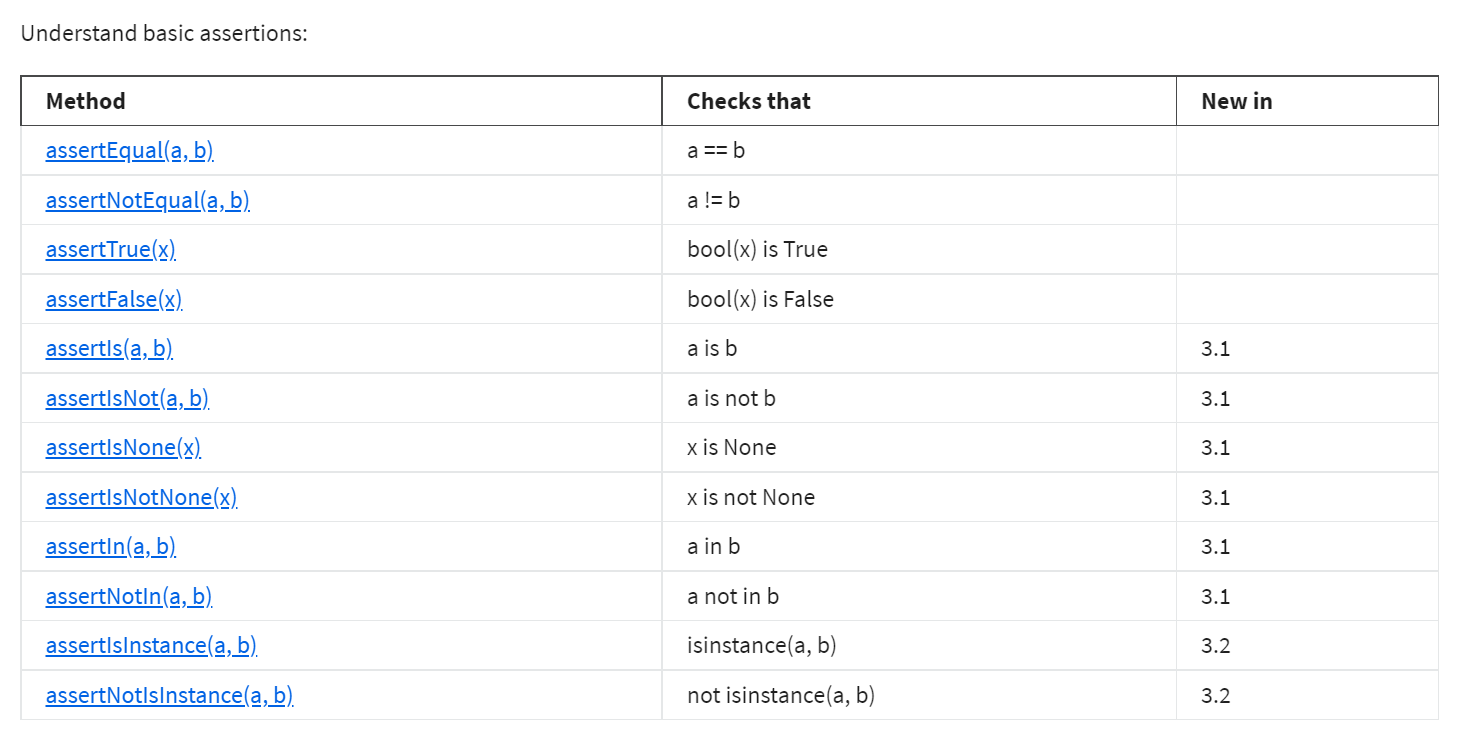

Understand more specific assertions such as assertRaises

*   https://docs.python.org/3/library/unittest.html#unittest.TestCase.assertRaises


#2-More About Tests

---



Check out the following links for more information:

https://landing.google.com/sre/sre-book/chapters/monitoring-distributed-systems/

https://landing.google.com/sre/sre-book/chapters/testing-reliability/

https://testing.googleblog.com/2007/10/performance-testing.html

https://www.guru99.com/smoke-testing.html

https://www.guru99.com/exploratory-testing.html

https://testing.googleblog.com/2008/09/test-first-is-fun_08.html

#3-Raising Errors

In [ ]:
try:
  print(Hell)
except NameError:
  print("Name Error")

Name Error


In [ ]:
def validate_user(username,minlen):
  if minlen < 1:
    assert type(username) == str, "username must be string"
    #assert keyword is used to avoid the situations it should never happen
    raise ValueError("minlen must be atleast 1")
    #raise keyword is used to check that the code should behave the way is should
    """assertion is removed when we optimize our code to run faster"""
  if len(username) < minlen:
    return False
  if not username.isalnum():
    return False
  return True

In [ ]:
validate_user(111,-1)

AssertionError: ignored

In [ ]:
import unittest

class TestValidateUser(unittest.TestCase):
	def test_valid(self):
		self.assertEqual(validate_user("validuser",3),True)

	def test_too_short(self):
		self.assertEqual(validate_user("inv",5),False)

	def test_invalid_characters(self):
		self.assertEqual(validate_user("invalid_user",1),False)

	def test_invalid_minlen(self):
		self.assertRaises(ValueError, validate_user,"user",-1)


	#Run the tests
	unittest.main(argv = ['first-arg-is-ignored'], exit = False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.011s

OK


Raise allows you to throw an exception at any time.

https://docs.python.org/3/tutorial/errors.html#raising-exceptions

Assert enables you to verify if a certain condition is met and throw an exception if it isn’t.



*   https://docs.python.org/3/reference/simple_stmts.html#the-assert-statement

*   https://stackoverflow.com/questions/5142418/what-is-the-use-of-assert-in-python





The standard library documentation is kind of unclear. Basically `assert <something false>` will raise AssertionError, which the caller may need to handle.

In the try clause, all statements are executed until an exception is encountered.

https://docs.python.org/3/tutorial/errors.html#handling-exceptions

Except is used to catch and handle the exception(s) that are encountered in the try clause.

https://docs.python.org/3/library/exceptions.html#bltin-exceptions

Other interesting Exception handling readings:

https://doughellmann.com/blog/2009/06/19/python-exception-handling-techniques/